In [27]:
%pylab inline
import re
n=18
max_l=10
in_root = '/mnt/store1/oliverphilcox/3PCF_QPM/full_run.v02/qpm.0014'

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [205]:
def reader(in_str):
    file_name = in_root+'.'+in_str+'.out'

    dat = np.zeros([n,n,max_l+1])

    with open(file_name) as f:
        start=False
        for line in f:
            if not start:
                if re.match("# Multipole",line):
                    start=True
                continue
            if re.match("Multipole",line):
                continue
            if len(line.split())==0:
                start=False
                continue
            if re.match('# Saving',line):
                start=False
                continue
            x=line.split()
            b1=int(x[0])
            b2=int(x[1])
            dat[b1,b2,0]=float(x[2])/2.
            if b1!=b2:
                dat[b2,b1,0]=float(x[2])/2.
            for ell in range(1,max_l+1):
                dat[b1,b2,ell]=float(x[ell+2])*float(x[2])*(2.*ell+1.)/2.
                if b1!=b2:
                    dat[b2,b1,ell]=float(x[ell+2])*float(x[2])*(2.*ell+1.)/2.
    return dat;

In [206]:
RRR = reader('rrr')
all_NNN = []
for i in range(33):
    tmp=reader('r%s'%(str(i).zfill(2)))
    all_NNN.append(tmp)
#    if np.isfinite(tmp.sum()):
#        if(tmp.sum()!=0.):
#            all_NNN.append(tmp)
DDD = reader('ddd')
NNN = np.mean(all_NNN,axis=0)

zeta_uncorr = NNN/(RRR[:,:,0].reshape(n,n,1))

## Load output values

In [241]:
zeta_uncorr[4,2]#/zeta_uncorr[4,2,0]

array([0.00224941, 0.0010682 , 0.00964315, 0.00660051, 0.00565382,
       0.00414222, 0.00309529, 0.00217508, 0.00182513, 0.00111125,
       0.0009975 ])

In [246]:
y=d.f.powerD[4,2]
y[1:]*=y[0]

In [267]:
zeta_uncorr[14,14,1]

-3.688193577531512e-05

In [268]:
zeta_npz[14,14,1]

433169154.92655814

In [248]:
d=np.load('/mnt/store1/oliverphilcox/3PCF_QPM/full_run.v02/tmp_3pcf_output.npz')
zeta_npz=d.f.powerD
for i in range(n):
    for j in range(n):
        zeta_npz[i,j,1:]*=zeta_npz[i,j,0]

In [249]:
zeta_npz.shape

(18, 18, 11)

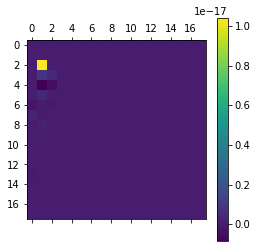

In [276]:
A=np.tril(zeta_uncorr[:,:,1])-np.eye(n)*np.diag(zeta_uncorr[:,:,1])
B=np.tril(zeta_npz[:,:,1])-np.eye(n)*np.diag(zeta_npz[:,:,1])
plt.matshow(A-B);plt.colorbar();